# Natural Language Processing

## examples of sentiment analysis, topic analysis, and text generation

1. Define question - What makes one comedian's material different from another's?
2. Get and clean data
3. Perform exploratory data analysis
4. Apply analsyis techniques
    + sentiment analysis
    + topic analysis
    + text generation
5. Share findings

# 1. Define question - What makes one comedian's material different from another's?

Use methods like sentiment analysis and topic identification to see how comedians differ by thier material.

In [ ]:
from bs4 import BeautifulSoup
import os
import re
import spacy
import requests
import pickle

# 2. Data collection

    1. Define the scope of the data to be used (what and how much)
    2. Define where you can get this data
    3. Have a plane for storage

## 2.1 Gather data by way of web scraping - Beautiful soup

In [ ]:
# def url_to_transcript(url):
#     '''
#     Returns transcriipt data from the target website, scrapsfromtheloft.com.
#     Content is taken from the "post-content" class.
#     '''
#     page = requests.get(url).text
#     soup = BeautifulSoup(page, 'lxml')
#     text = [p.text for p in soup.find(class_="post-content").find_all('p')]
#     print(url)
#     return text


# # URLs of transcripts in scope
# urls = [
#     'http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
#     'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
#     'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
#     'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
#     'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/'
# ]

# # Use comedian's short names, in order with the URLs listed, as keys to their respective content.
# comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim',
#              'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

# # request transcripts (takes a few minutes to run)
# transcripts = [url_to_transcript(url) for url in urls]

# # Save the work as a pickled file for use later
# !mkdir transcripts
# for index, comedian in enumerate(comedians):
#     with open('transcripts/' + comedian + '.txt', 'wb') as file:
#         pickle.dump(transcripts[index], file)

## 2.2 Clean the data

1. Get the corpus i.e collect all the data into a table with the comedian on one cloumn and their material in the next column, in a dataframe (Pandas).
2. Create a document-term matrix:
    + clean text - remove unneccessary parts of text, punctuation, etc.
    + tokenize the text - change the 'words' into machine usable symbols
    + create document matrix - put the document into a form the machine can understand

In [ ]:
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim',
             'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']
# Load pickled files and check that the data has been recovered
raw_data = {} # use a dictionary with the comedians' names as keys and the transcripts as values
for i, comedian in enumerate(comedians):
    with open('transcripts/' + comedian + '.txt', 'rb') as file:
        raw_data[comedian] = pickle.load(file)
# check key, names
print('{}\n'.format(raw_data.keys()))

# # check value, text. You might notice that there are non-ascii values in the corpus
print('louis:\t{}\n'.format(raw_data['louis'][:2]))

You may not recognize it, but the text is set as blocks within single quotes with each block separated by a comma. In this case block 0 and 1 are separated at [all.', '“The]

When dealing with numerical data, data cleaning often involves removing null values and duplicate data, dealing with outliers, etc. With text data, there are also some common data cleaning techniques, which are also known as text pre-processing techniques.

With text data, this cleaning process can go on forever. At some place you must stop and move on to the next step. When you stop is up to the precision required. There are always exceptions to every cleaning step. So, we're going to follow the MVP (minimum viable product) approach - start simple and iterate. Here are a bunch of things you can do to clean your data. We're going to execute just the common cleaning steps here and the rest can be done at a later point to improve the results.

Common data cleaning steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (e.g. /n)
* Tokenize text (break a block of text into sentences or words)
* Remove stop words (words that add no understadning to the larger body of text e.g. the, and, a, etc.)

More data cleaning steps after tokenization:
* Stemming / Lemmatization (fining variations on a word and changing them to be all the same word e.e. run, ran, running, all become run)
* Parts of speech tagging (looking for nouns, verb, adjectives, etc.)
* Create bi-grams or tri-grams (words, nornally identified by whitespace will lose the fact that San Francisco is "San Francisco" the two words indicating one place)
* Deal with typos and misspelled words (their, thier, etc.)
Do these later

In [ ]:
#==============================================================================
# next is shorthand for asking for the next item in the list. By the dictionary 
# keys given above, 'louis' is the first one listed.
next(iter(raw_data.keys()))

In [ ]:
#==============================================================================
# Notice that our dictionary is currently in key: comedian, value: list of text 
# format
next(iter(raw_data.values()))

In [ ]:
#==============================================================================
# We are going to change this to key: comedian, value: string format
def combine_text(list_of_text):
    '''
    Takes a list of text strings and combines them into one large string of text.
    '''
    # Combine all lines of a comedian's material into one line of text.
    combined_text = ' '.join(list_of_text)
    return combined_text

# create a data object, a dictionary, with the name as key and the combined text 
# as the value. So for a given comedian, take the text and put it into one long 
# string
raw_data_combined = {key: [combine_text(value)] for (key, value) in raw_data.items()}
raw_data_combined

Put the data into a dataframe for easier data manipulation and analysis

In [ ]:
import pandas as pd
#==============================================================================
# Set the width of the display to show a limited muber of characters, to avoid 
# word-wrap
pd.set_option('max_colwidth',100)

# flip the data by its leading diagonal, so a comedian's name is in the first 
# column and the text is in the second. From here on this format will be known 
# as "by_comedian"
comedian_transcripts = pd.DataFrame.from_dict(raw_data_combined).transpose()
comedian_transcripts.columns = ['transcript'] # add a name to the column to make it easier to reference later
comedian_transcripts = comedian_transcripts.sort_index() # sort the transcript on the index, the comedians' first names
comedian_transcripts # look at the first 125 charaters of each transcript

## 2.3 Tokenize the data - sentence, fragment, word

### Apply a first round of text cleaning techniques

In [ ]:
import pandas as pd
import re
import string

#==============================================================================
# make a function that removes crap, just but using regex.
def clean_text(text):
    ''' 
    Make text lowercase, remove text in square brackets, remove punctuation and 
    remove words containing numbers. 
    '''
    text = text.lower() # make text lower case
    text = re.sub('\\[.*?\\]', '', text) # remove any brackets and the content within it
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove the punctuation marks (string.punctuation)
    text = re.sub('\\w*\\d\\w*', '', text) # remove an words with numbers in them
    text = re.sub('[‘’“”…]', '', text) # remove non-ascii quotes and apostrophies
    text = re.sub('\\n', '', text) # remove line break characters
    text = re.sub('\s{2,}', ' ', text) # remove multiple spaces
    return text
    
#==============================================================================
# Make use of the apply function. Identify the series in the dataframe, 
# followed by the function you want to apply to that series, and add the name 
# of the function, without the parenteses within the parentheses of the apply 
# method. This will return the results of the referenced method to each element 
# in the series. In this case data_df.transcript is the series submitted and for
# each element in that series, it is replaced by the result of the function.
comedian_transcripts_cleaned = pd.DataFrame(comedian_transcripts.transcript.apply(clean_text))

# Let's take a look at the updated text
comedian_transcripts_cleaned

In [31]:
#==============================================================================
# Let's add the comedians' full names as a column. In this case, the comedians'
# names are in a list alphabetized by first name. This will match up with the 
# data set cleaned_transcripts_by_comedian where the first name is the key.
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 
    'Dave Chappelle', 'Hasan Minhaj','Jim Jefferies', 'Joe Rogan', 
    'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# add the full names of the comedians in a new coloumn
comedian_transcripts_cleaned['full_name'] = full_names
comedian_transcripts_cleaned


,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you f...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were sur...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going o...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to d...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit d...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for comin...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hell...,John Mulaney
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much ...,Louis C.K.


### Save the work

Doing this saves you from having to reprocess the entire file to run the next <br>
block of text - in case you want to tweak something and see what happens

In [32]:
#==============================================================================
# Let's pickle it for later use
comedian_transcripts_cleaned.to_pickle('comedian_transcripts_cleaned.pkl')

### Load the work

In [33]:
#==============================================================================
# Load the dictionary back from the pickle file.
import pickle

comedian_transcripts_cleaned = pickle.load(open('comedian_transcripts_cleaned.pkl', 'rb'))
comedian_transcripts_cleaned

,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you f...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were sur...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going o...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to d...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit d...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for comin...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hell...,John Mulaney
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much ...,Louis C.K.


### Document-Term Matrix
#==============================================================================

For many of the techniques we'll be using in future notebooks, the text must be<br> 
tokenized, meaning broken down into smaller pieces. The most common <br>
tokenization technique is to break down text into words. We can do this using <br>
scikit-learn's CountVectorizer, where every row will represent a different <br>
document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. Stop words are <br>
common words that add no additional meaning to text such as 'a', 'the', etc.

But first an explanation of document-term and term document matrices. A matrix <br>
can be thought of as a type of spreadsheet (or n-dimensional array) where the <br>
position of a given cell is found by refering to the row, then the column. In a<br>
document-term matrix, the reference to the document holding a given term is <br>
listed in the row; the term, or word, is found in the column.

If given <br>
Document 1 (D1) = "I like databases"<br>
Document 2 (D2) = "I hate databases"<br>
then the document-term matrix would be:<br>

<table style="width:20%">
<tr>
<th></th>
<th>I</th>
<th>like</th>
<th>hate</th>
<th>databases</th>
</tr>
<tr>
<td>D1</td>
<td>1</td>
<th>1</th>
<th>0</th>
<th>1</th>
</tr>
<tr>
<td>D2</td>
<td>1</td>
<th>0</th>
<th>1</th>
<th>1</th>
</tr>
</table>

#==============================================================================

A term-document matrix holds the same information but the matrix is transformed<br>
by rotating it on the leading axis (first row, first column to the last row, <br>
last column) so that the terms, or words, are listed down the row and the <br>
reference to the document is listed along the column.

<table style="width:10%">
<tr>
<th> </th>
<th>D1</th>
<th>D2</th>
</tr>
<tr>
<td>I</td>
<td>1</td>
<th>1</th>
</tr>
<tr>
<td>like</td>
<td>1</td>
<th>0</th>
</tr>
<tr>
<td>hate</td>
<th>0</th>
<th>1</th>
</tr>
<tr>
<td>databases</td>
<th>1</th>
<th>1</th>
</tr>
</table>


In [34]:
comedian_transcripts_cleaned.index

Index(['ali', 'anthony', 'bill', 'bo', 'dave', 'hasan', 'jim', 'joe', 'john',
       'louis', 'mike', 'ricky'],
      dtype='object')

In [35]:
#==============================================================================
#  retrieve the pickled file
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')


from sklearn.feature_extraction.text import CountVectorizer

# define the instance of CountVectorizer and add a reference to the stop words
# in English. We will add a list of special stop-words later.
cv = CountVectorizer(stop_words='english')

# Begin to process the transcripts, removing the stop words and put it into a
# matrix.
comedian_transcripts_cleaned_vectorized = cv.fit_transform(comedian_transcripts_cleaned.transcript)
# comedian_transcripts_cleaned_vectorized is now an object

#==============================================================================
# Save this spot for Lemitizing and Stemming words...
#==============================================================================

# convert data object into an array, a document-term matrix. Notice that the 
# column names are the words themselves
comedian_word_matrix = pd.DataFrame(comedian_transcripts_cleaned_vectorized.toarray(), columns=cv.get_feature_names())
comedian_word_matrix.index = comedian_transcripts_cleaned.index
comedian_word_matrix

# If you did not include the argument "columns=cv.get_feature_names()", you would
# get the number as a tolken for the word it represent, making it very un-friendly 
# for human readability 
# comedian_words_matrix2 = pd.DataFrame(comedian_transcripts_cleaned_vectorized.toarray())
# comedian_words_matrix2.index = comedian_transcripts_cleaned.index
# comedian_words_matrix2


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [36]:
# save the work
comedian_word_matrix.to_pickle("./comedian_word_matrix.pkl")

# 3. Exploratory Data Analysis (EDA)

Use the corpus and the document-term matrix to perform EDA to figure out the main trends in the data and see if our intended analysis makes sense.

* Data: determine the format of the raw data you will need to begin analysis
* Aggregate: figure out how to aggregate the data
* Visualize: find the best way to visualize the data 
* Insights: Extract some key insights from the visualizations

Use frequency, or word counts, to see what topic or subject seems to keep being mentioned.

* top word(s)
* vocabulary
* jargon or specialty words (differentiating it from other texts)

### Top words run a tally for top words for each comedian. You can visualize the text as a word cloud, bar plot, scatter plot, etc. to see what one comedian looks like when compared to another.

In [54]:
import pandas as pd 
#  retrieve the pickled file
comedian_word_matrix = pd.read_pickle('comedian_word_matrix.pkl')

#==============================================================================
# We will now transpose the dataframe on the leading diagonal so we can tally 
# the words used by each comedian. This is easier to do when the values are in 
# a column.
word_comedian_matrix = comedian_word_matrix.transpose()

# save the work
word_comedian_matrix.to_pickle("word_comedian_matrix.pkl")
word_comedian_matrix

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
#==============================================================================
# Find the top 30 words said by each comedian using head()with 30 as the 
# argument of how many rows to return. sort_values(ascending=False) starts the 
# list with the most frequently used words listed first.
top_words_by_comedian = {}
for comedian in word_comedian_matrix.columns:
    top_words = word_comedian_matrix[comedian].sort_values(ascending=False).head(30)
    top_words_by_comedian[comedian]= list(zip(top_words.index, top_words.values))

top_words_by_comedian

{'ali': [('like', 126),
  ('im', 74),
  ('know', 65),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('time', 19),
  ('got', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('tell', 13),
  ('yeah', 13),
  ('theyre', 12),
  ('really', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('just', 26),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('grandma', 18),
  ('right', 18),
  ('time', 17),
  ('think', 17),
  ('thing', 17),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('jokes', 16),
  ('yeah', 16),
  ('ive', 15),
  ('okay', 15),
  ('gonna', 15),
  ('baby', 15)],

In [39]:
comedian_word_matrix.head()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#==============================================================================
# Using the dictionary of comedians and the list of words used by each one, 
# print the top 20 words said by each comedian
for comedian, top_words in top_words_by_comedian.items():
    # print(comedian)
    # print(', '.join([word for word, count in top_words[0:19]]))
    # print('---')
# or
    print('{}:\n{}'.format(comedian, ', '.join([word for word, count in top_words[0:19]])))
    print('---')

ali:
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, wanna, oh, gotta, husband, time, got, right, cause
---
anthony:
im, like, know, dont, joke, got, said, thats, anthony, just, day, say, guys, people, tell, youre, grandma, right, time
---
bill:
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, want, fuck, think, people, did
---
bo:
know, like, im, love, think, just, bo, stuff, repeat, dont, yeah, want, right, cos, fucking, eye, said, people, um
---
dave:
like, know, said, just, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking, black, man, got, good, right
---
hasan:
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan, say, right, time, people, mom
---
jim:
like, im, dont, right, fucking, just, went, know, youre, people, thats, day, oh, going, think, fuck, goes, thing, said
---
joe:
like, people, just, dont, im, fucking, fuck, thats, gonna, theyre, know, youre, think, shit, got, theres, 

NOTE: At this point, we could go on and create word clouds. However, by looking<br>
at these top words, you can see that some of them have very little meaning and <br>
could be added to a stop words list, as in 'like', 'just, and 'know.' So let's do just that.

## Remove common words between comedians
Identify the words most comedians use and remove them from the text we are <br>
analyzing, since those words will not help in the effort to differentiate comedians.

In [41]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
shared_words = []
for comedian in word_comedian_matrix.columns:
    top = [word for (word, count) in top_words_by_comedian[comedian]]
    for t in top:
        shared_words.append(t)
shared_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'time',
 'got',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'tell',
 'yeah',
 'theyre',
 'really',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'said',
 'thats',
 'anthony',
 'just',
 'day',
 'say',
 'guys',
 'people',
 'tell',
 'youre',
 'grandma',
 'right',
 'time',
 'think',
 'thing',
 'did',
 'good',
 'school',
 'jokes',
 'yeah',
 'ive',
 'okay',
 'gonna',
 'baby',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'want',
 'fuck',
 'think',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'love',
 'think',
 'just',
 'bo',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'eye',
 'said',
 'p

In [42]:
#==============================================================================
# Aggregate the list of 360 words and identify the most commonly used words 
# among all the comedians - given it would make it difficult to differentiate 
# one comedian from another if they all use the same word.
# You can see that most_common() function returns a list, which is sorted based 
# on the count of the elements. A word followed by 12 means the word was used 
# by all 12 comedians
Counter(shared_words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('time', 9),
 ('gonna', 8),
 ('think', 8),
 ('yeah', 7),
 ('said', 7),
 ('oh', 6),
 ('cause', 6),
 ('hes', 6),
 ('theyre', 6),
 ('really', 6),
 ('say', 6),
 ('fucking', 6),
 ('fuck', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theres', 5),
 ('did', 4),
 ('little', 4),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('school', 2),
 ('guy', 2),
 ('make', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('okay', 1),
 ('baby', 1),
 ('dude', 1),
 ('l

In [43]:
#==============================================================================
# If more than half of the comedians have it as a top word, exclude it from the
# list
add_stop_words = [word for word, count in Counter(shared_words).most_common() if count > 6]
add_stop_words

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'time',
 'gonna',
 'think',
 'yeah',
 'said']

This list of words will be added to the stop words list to remove noise in our analysis

In [44]:
#==============================================================================
# Update the document-term matrix by removing the words in the list of stop 
# words. CountVectorizer converts a collection of text documents to a matrix of 
# token counts.

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data, not the vectorized, which was used to find the similar 
# words
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv_with_stop_words = CountVectorizer(stop_words=stop_words) #this is what will be applied to the corpus
comedian_word_cleaned_vectorized = cv_with_stop_words.fit_transform(comedian_transcripts_cleaned.transcript)
comedian_word_without_stop_words = pd.DataFrame(comedian_word_cleaned_vectorized.toarray(), columns=cv_with_stop_words.get_feature_names())
comedian_word_without_stop_words.index = comedian_transcripts_cleaned.index

# Pickle it for use later in topic modeling
import pickle
pickle.dump(cv_with_stop_words, open("cv_with_stop_words.pkl", "wb"))# the CountVectorize object with the custom stopwords added
comedian_word_without_stop_words.to_pickle("comedian_word_without_stop_words.pkl") # comedian word matrix without stopwords

# save work
comedian_word_without_stop_words.to_pickle("./comedian_word_without_stop_words.pkl")
comedian_word_without_stop_words


,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


Now we have a matrix of comedian words, cleaned of punctuation, and meaningless<br>
blocks of text,also with the stop words removed

In [45]:
#==============================================================================
# Let's make some word clouds!
# Add this library with the following command
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
# We need to define the charateristics of the wordcloud before we can find the 
# most used words by comdiean and show the most frequently used words as large
# and less frequently used words as small.

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)
# Here is an alternate format:
# wc = WordCloud(stopwords=stop_words, background_color="black", max_font_size=150, random_state=42)

In [46]:
#  retrieve the pickled file
comedian_word_without_stop_words = pd.read_pickle('comedian_word_without_stop_words.pkl')

# tanspose the doument-term matrix to a term-document matrix
word_comedian_without_stop_words = comedian_word_without_stop_words.transpose()
word_comedian_without_stop_words.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


## Remove stop words from a corpus without losing the order, context, of the words

In [47]:
comedian_transcripts_cleaned.transcript[0]

fatherinlaw had this huge sitdown with me and my husband recently um and he was like hey i wanna talk to you guys about money you guys need to make a lot more money if you wanna provide your children with the same kind of privileged childhood that you guys had i was like why you telling me this shit i should not be a part of this conversation you tell you son that dont your understand that i trapped your son for his earning potential why else would i choose to fuck one person for the rest of my life i chose to marry him on the promise of early retirement and when i said i do what i really meant was oh im done im done i dont wanna work anymore and im not dieting anymore since i got married last year ive been eating fried chicken skin every day since thats right and just fulfilling my destiny which is to turn into a circle with eyelashes like mrs pacman just lets redecoratei gave up a lot of myself when i got married im a– im a disgusting pervert im a pervert im a gross filthy animal and

In [48]:
#==============================================================================
# We will remove the stopwords from the comedians' transcripts that were
# cleaned of punctuation, etc. while preserving the order of the words.
# The nltk library will help here.

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
# make a list of the stopwords so our custome stop words can be appended 
# to the list
all_stopwords = stopwords.words('english')

# append the stop words, the words shared by the comedians
all_stopwords.append([stop_word for stop_word in add_stop_words])

# Go through each routine, breaking the routine into words. Remove the
# stop words, then reassmble the list of words in to a string and replace
# the original routine text with the 'new and imporved' cleaned text

# The easist way to clean the text of all stop words is to define a 
# function that will remove all the stop words, and apply it to a dataframe
def remove_stopwords_from_transcript(transcript):
    # take in the text and tokenize it
    text_tokens = word_tokenize(transcript)
    
    #==========================================================================
    # ues a list comprehension to look for a stop word in the list and remove 
    # it, otherwise add it to a list of transcript words, in the order given
    tokens_without_stopwords = [word for word in text_tokens if not word in all_stopwords]

    # put the list back into a string representing the routine of the comedian
    filtered_sentence = (" ").join(tokens_without_stopwords)
    
    # return the cleaned string
    return filtered_sentence

comedian_transcripts_cleaned = pd.DataFrame(comedian_transcripts.transcript.apply(remove_stopwords_from_transcript))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adamd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


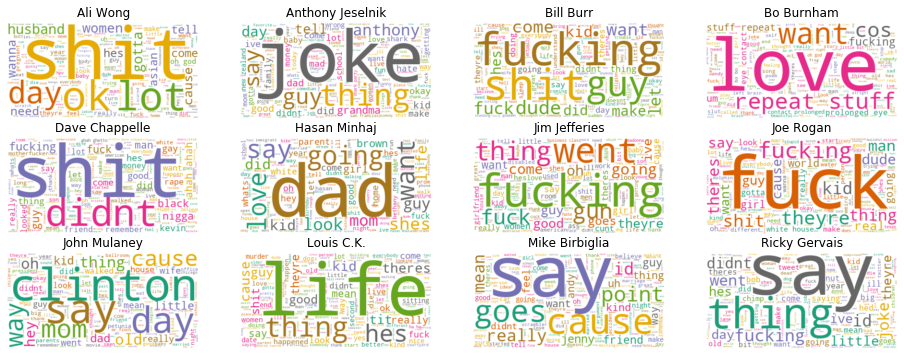

In [50]:
#==============================================================================
#  retrieve the pickled file
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')

# Reset the output dimensions for the plotting area
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Define the titles for each of the wordclouds
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 
    'Dave Chappelle', 'Hasan Minhaj', 'Jim Jefferies', 'Joe Rogan', 
    'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']


# Create wordcloud plots for each comedian
# process each column
for index, comedian in enumerate(word_comedian_without_stop_words.columns):
    # make a wordcloud referencing the cleaned transcript, not the matrix
    wc.generate(comedian_transcripts_cleaned.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Put data into a martix for analysis

In [55]:
#  retrieve the pickled file
word_comedian_matrix = pd.read_pickle('word_comedian_matrix.pkl')

import numpy as np 
#==============================================================================
# Find the number of unique words that each comedian uses
# # Identify the non-zero items in the document-term matrix, meaning that the 
# word occurs at least once
unique_list = []

for comedian in word_comedian_matrix.columns:
    uniques = word_comedian_matrix[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words', ascending=False)
data_unique_sort

,comedian,unique_words
2,Bill Burr,1633
11,Ricky Gervais,1633
5,Hasan Minhaj,1559
10,Mike Birbiglia,1494
7,Joe Rogan,1435
4,Dave Chappelle,1404
8,John Mulaney,1389
0,Ali Wong,1341
6,Jim Jefferies,1313
3,Bo Burnham,1272


# Calculate the words per minute of each comedian

louis-ck-oh-my-god | https://www.imdb.com/title/tt2510998/ | <time>58 minutes</time>

In [58]:
#==============================================================================
# Find the total number of words that a comedian uses

#  retrieve the pickled file
word_comedian_without_stop_words = pd.read_pickle('word_comedian_without_stop_words.pkl')

total_list = []
# for comedian in data_dtm_transpose.columns:
for comedian in word_comedian_without_stop_words.columns:
    totals = sum(word_comedian_without_stop_words[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks fastest to slowest
data_wpm_sort = data_words.sort_values(by='words_per_minute')#, ascending=False)
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,983,2472,59,41.898305
0,Ali Wong,1341,2701,60,45.016667
3,Bo Burnham,1272,2773,60,46.216667
9,Louis C.K.,1098,2687,58,46.327586
10,Mike Birbiglia,1494,3730,76,49.078947
6,Jim Jefferies,1313,3982,77,51.714286
4,Dave Chappelle,1404,3473,67,51.835821
11,Ricky Gervais,1633,4238,79,53.645570
2,Bill Burr,1633,4318,80,53.975000
8,John Mulaney,1389,3357,62,54.145161


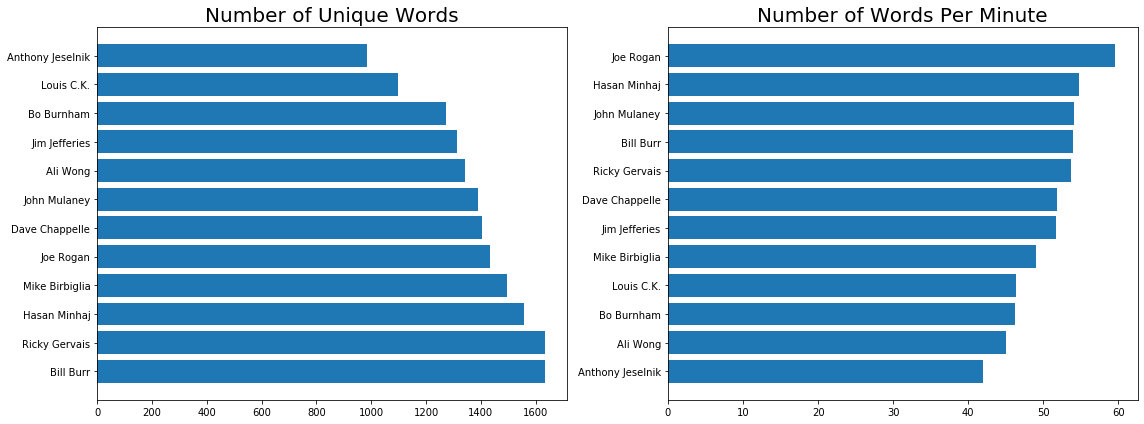

In [59]:
#==============================================================================
# Run block about to generate data_unique_sort and data_wpm_sort to plot the
# findings. 
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Anthony Jeselnik talks slow and uses fewer words, as though talking to someon who isn't very bright.
Dave Chappele is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

Assume that profanity is a distraction; F- is used for every part of speech as a filler word. At the same time saying 'that was shit' has the opposite meaning to 'that was the shit' - idiomatic.

In [62]:
#==============================================================================
# Let's isolate just these 'blue' words and see how frequntly they are used by 
# a given comedian.

#  retrieve the pickled file
word_comedian_without_stop_words = pd.read_pickle('word_comedian_without_stop_words.pkl')

# Get a count of each word as used by each comedian
data_blue_words = word_comedian_without_stop_words.transpose()[['fucking', 'fuck', 'shit', 'nigga']]

# Combine variations of similar words to be counted as the same i.e. fucking, 
# fuckin, and fuck, etc. all treated as the same
data_profanity = pd.concat([data_blue_words.fucking + data_blue_words.fuck, 
    data_blue_words.shit, data_blue_words.nigga], axis=1)
data_profanity.columns = ['f_word', 's_word', 'n_word']
data_profanity

,f_word,s_word,n_word
ali,16,34,0
anthony,15,9,0
bill,106,63,0
bo,37,6,0
dave,65,45,20
hasan,24,15,0
jim,115,20,0
joe,135,40,0
john,4,6,0
louis,21,25,0


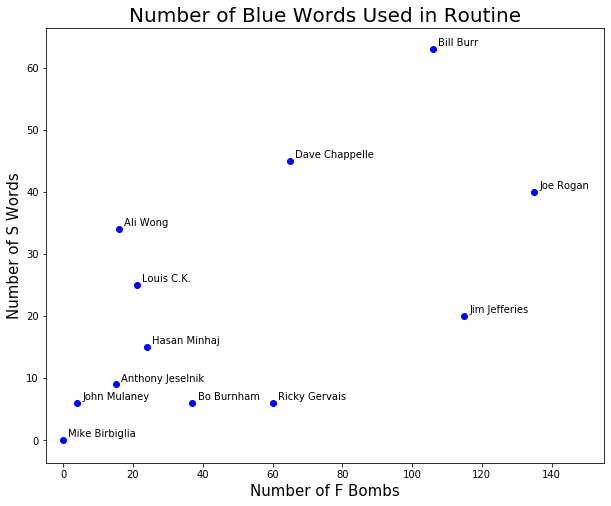

In [63]:
#==============================================================================
# Run the block above to generate 'data_profanity'
# Create a scatter plot of the 'f_word' against 's_word'
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Blue Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

Make a 3D plot of blue words 'f_word', 's_word', 'n_word' used by the comedians

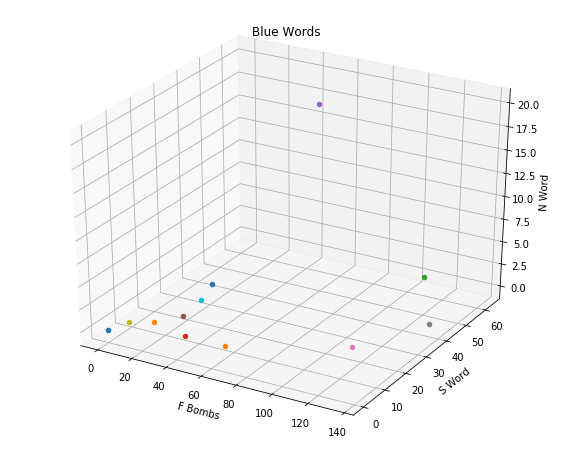

In [64]:
#==============================================================================
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
# ax = plt.axes(projection='3d')

# Data for a three-dimensional line
for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    z = data_profanity.n_word.loc[comedian]
    ax.scatter(x, y, z)

ax.set_title('Blue Words')
ax.set_xlabel('F Bombs')
ax.set_ylabel('S Word')
ax.set_zlabel('N Word')

fig.show()

Add an interactive 3D graph here

## Who talks about family

In [66]:
#==============================================================================
#  retrieve the pickled file
word_comedian_without_stop_words = pd.read_pickle('word_comedian_without_stop_words.pkl')

# Let's isolate just the words that relate to family and see how frequntly they are used by a given comedian.
data_family_words = word_comedian_without_stop_words.transpose()[['dad', 'mom', 'kids', 'husband', 'wife','grandma']]
data_family = pd.concat([data_family_words.dad, data_family_words.mom, 
    data_family_words.kids, data_family_words.husband, data_family_words.wife, 
    data_family_words.grandma], axis=1)
data_family.columns = ['dad', 'mom', 'kids', 'husband', 'wife','grandma']
data_family

,dad,mom,kids,husband,wife,grandma
ali,2,9,0,20,0,2
anthony,12,11,6,1,0,18
bill,6,2,15,0,9,1
bo,4,1,0,0,0,0
dave,3,0,5,1,9,0
hasan,59,25,9,0,0,0
jim,2,0,6,0,3,0
joe,7,7,25,1,1,0
john,17,22,13,0,18,1
louis,1,1,18,0,0,0


What does that look like?

In [ ]:
#==============================================================================
# Run the block above to generate 'data_family'

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_family.index):
    x = data_family.dad.loc[comedian]
    y = data_family.mom.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)

plt.title('Number of References to Parents in a Routine', fontsize=20)
plt.xlabel('Number of Dads', fontsize=15)
plt.ylabel('Number of Moms', fontsize=15)

plt.show()

Hasan Minhaj, John Mulaney and Anthony Jeselnik appear to talk about family with<br>
some frequency. Ali Wong, Joe Rogan seem to talk about their moms, not so much their<br>
dads; the balance reference their folks infrequently.

# 4. Sentiment Analysis

The analysis has been pretty basic - looking at counts, creating scatter plots,<br>
etc. These techniques could be done with traditional methods of numeric analysis.

When it comes to text data, the ability to get answers to questios like: is the<br>
speaker for or against the topic? is this opionated or objective? How similar are <br>
these (some number) pieces? Sentiment analysis can help with that. A few terms to <br>
remember when undertaking sentiment analysis.

* TextBlob Module: This has a refernce file where linguistic researchers have <br>
labeled, assigned values to, the sentiment of words based on their domain expertise. <br>
Sentiment of words can vary based on where it is in a sentence. The TextBlob module <br>
allows us to take advantage of these labels.
* Sentiment Labels: Each word in a corpus is labeled in terms of polarity and <br>
subjectivity (there are more labels as well). The sentiment of a corpus is the <br>
average of these sentement values.
* Polarity: How positive or negative a word is. -1 is very negative. +1 is very <br>
positive. Again, these values have been pre defined by linguists.
* Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very <br>
much an opinion. Again, these values have been pre defined by linguists.

For more info on how TextBlob coded up its 
[sentiment function](https://planspace.org/20150607-textblob_sentiment/).

An advanced, and very large, undertaking would be to devlop a new 'dictionary' <br>
with sentiment and objectivity values

## Sentiment of Routine

In [68]:
#==============================================================================
# We'll start by reading in the document term matrix - without the stop words
import pandas as pd

#  retrieve the pickled file
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')
comedian_transcripts_cleaned


,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you f...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were sur...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going o...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to d...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit d...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for comin...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hell...,John Mulaney
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much ...,Louis C.K.


### First, a few words about TextBlob

* https://github.com/sloria/TextBlob 
* for full documentation, go to https://textblob.readthedocs.io/.
* Features
* Noun phrase extraction
* Part-of-speech tagging
* Sentiment analysis
* Classification (Naive Bayes, Decision Tree)
* Tokenization (splitting text into words and sentences)
* Word and phrase frequencies
* Parsing
* n-grams [being able to keep "great" and "not great" in context, differing from BOW analysis]
* Word inflection (pluralization and singularization) and lemmatization
* Spelling correction
* Add new models or languages through extensions
* WordNet integration


In [ ]:
# from textblob import TextBlob
# # define lamda functions for getting the senitment (polarity) and subjectivity
# pol = lambda x: TextBlob(x).sentiment.polarity
# sub = lambda x: TextBlob(x).sentiment.subjectivity

In [71]:
from textblob import TextBlob

# demonstrate the sentiment analysis of a positive opinion
sentiment_sandwhich = TextBlob("I love a good sandwhich").sentiment
sentiment_sandwhich

Sentiment(polarity=0.6, subjectivity=0.6000000000000001)

Polarity runs on a scale of -1 to 1 and subjectivity on a scale of 0 to 1. In the case above, a polarity of .6 is well into the positive range. A subjectivity of .6 implies that the statement leans toward opinion. This might be confusing, given it is an opinion, but "good sandwich" is not qualified. Moving on... 

In [72]:
from textblob import TextBlob

sentiment_stinkers = TextBlob("I hate those stinking stinkers").sentiment
sentiment_stinkers

Sentiment(polarity=-0.8, subjectivity=0.9)

In the case above, a polarity of -.8 is well into the negative range (hate). A subjectivity of .9 implies that the statement almost pegs opinion. 

In [73]:
from textblob import TextBlob

sentiment_temperature = TextBlob("it is 75 degrees today").sentiment
sentiment_temperature

Sentiment(polarity=0.0, subjectivity=0.0)

Again, polarity runs on a scale of -1 to 1 and subjectivity on a scale of 0 to 1. In the case above, a polarity of 0.0 is perfectly neutral. A subjectivity of .0 implies that the statement is fact. 

In [76]:
#==============================================================================
# We'll start by reading in the document term matrix - without the stop words
import pandas as pd

#  retrieve the pickled file
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')

from textblob import TextBlob
# define lamda functions for getting the senitment (polarity) and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

comedian_transcripts_cleaned['polarity'] = comedian_transcripts_cleaned['transcript'].apply(pol)
comedian_transcripts_cleaned['subjectivity'] = comedian_transcripts_cleaned['transcript'].apply(sub)

comedian_transcripts_with_sentiment = comedian_transcripts_cleaned

# save the work
comedian_transcripts_with_sentiment.to_pickle("./comedian_transcripts_with_sentiment.pkl")
comedian_transcripts_with_sentiment

,transcript,full_name,polarity,subjectivity
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you f...,Ali Wong,0.066765,0.479597
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were sur...,Anthony Jeselnik,0.045507,0.565955
bill,all right thank you thank you very much thank you thank you thank you how are you whats going o...,Bill Burr,0.008257,0.543996
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,Bo Burnham,0.073695,0.553921
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens...,Dave Chappelle,-0.005095,0.515816
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to d...,Hasan Minhaj,0.080180,0.464121
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit d...,Jim Jefferies,0.038131,0.538653
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for comin...,Joe Rogan,0.005476,0.556626
john,all right petunia wish me luck out there you will die on august thats pretty good all right hell...,John Mulaney,0.074638,0.491434
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much ...,Louis C.K.,0.051626,0.523858


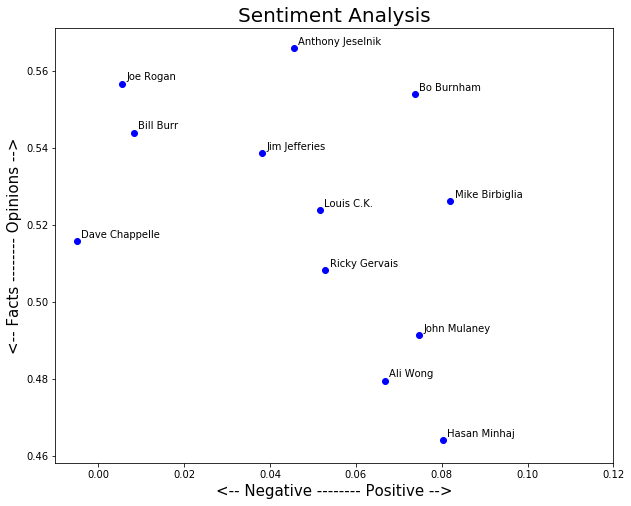

In [78]:
#  retrieve the pickled file
comedian_transcripts_with_sentiment = pd.read_pickle('comedian_transcripts_with_sentiment.pkl')

from textblob import TextBlob

# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(comedian_transcripts_with_sentiment.index):
    x = comedian_transcripts_with_sentiment.polarity.loc[comedian]
    y = comedian_transcripts_with_sentiment.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, comedian_transcripts_with_sentiment['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

Reprint the graph to demonstrate differences in the full range of sentiment (-1 to 1) and objectivity (0 to 1). Now can comedians be thought of as a group?

You will see that they appear to be a pretty tight cluster after all.

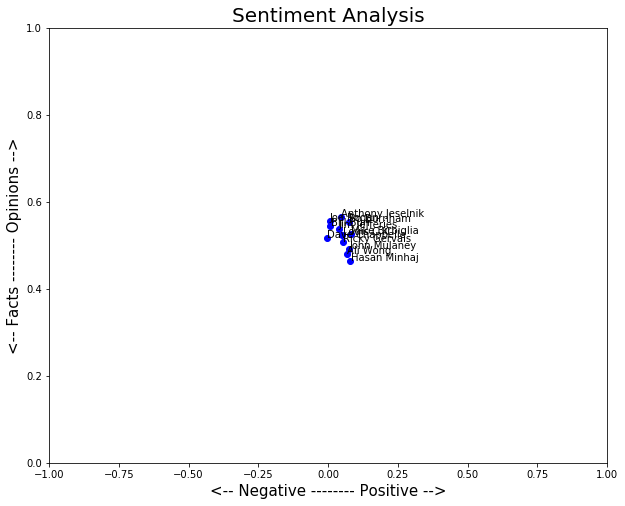

In [79]:
#  retrieve the pickled file
comedian_transcripts_with_sentiment = pd.read_pickle('comedian_transcripts_with_sentiment.pkl')

# Let's plot the results - the bigger picture
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(comedian_transcripts_with_sentiment.index):
    x = comedian_transcripts_with_sentiment.polarity.loc[comedian]
    y = comedian_transcripts_with_sentiment.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, comedian_transcripts_with_sentiment['full_name'][index], fontsize=10)
    plt.xlim(-1, 1) 
    plt.ylim(0, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Longitudinal Sentiment Analysis
Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time through each of thier routines.

In [83]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [81]:
# Let's take a look at our data again
#  retrieve the pickled file
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')
comedian_transcripts_cleaned

,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you f...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were sur...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going o...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to d...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit d...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for comin...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hell...,John Mulaney
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much ...,Louis C.K.


In [84]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in comedian_transcripts_cleaned.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

n his mind all the time right it was the only thing he feared the wig coming off in public and this ridiculous lie being exposed he was in the army hard as nails he wasnt scared of anyone or anything spiders snakes cancer hows the chemo going uncle not a problem weve got a photo of him the last year i think he was it must have been the last year he was alive it was a hot day he was in the garden in his little trunks he was a wizened little man by then white chest hair jet black wig still died in it buried in it hes wearing it now a little skeleton with jet black hair like posh spice for eternity but i knew that was gonna happen i knew i would get old and fat and ill and blind and deaf and shit myself and be pushed round in a fucking bucket youre ready because youre warned you know about getting old what they dont talk about so youre not prepared and it was a shock to me i only found out recently ill share it with you now the distending testicles see you dont know about it but it happen

In [ ]:
sanity check

In [85]:
import numpy as np
# The list has 10 elements, one for each transcript
list_pieces_shape = np.asarray(list_pieces)
list_pieces_shape.shape

(12, 10)

We have twelve comedians with their routines broken up into 10 segments

In [90]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
# polarity_transcript # returns a matrix of numeric values

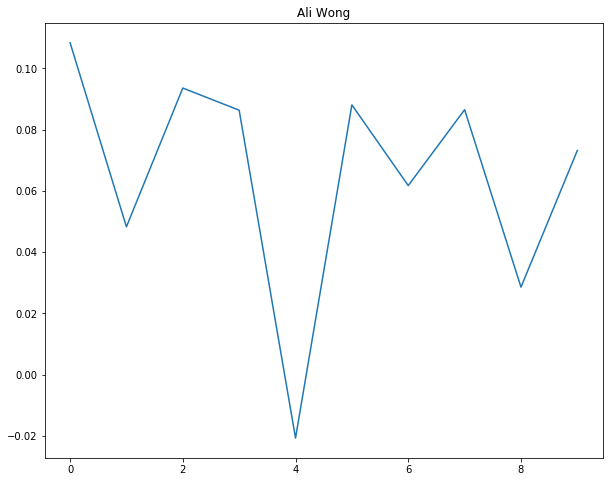

In [92]:
#==============================================================================
# Run the block above to generate 'polarity_transcript'

#  retrieve the pickled file
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')

# Show the plot for one comedian

plt.plot(polarity_transcript[0])
plt.title(comedian_transcripts_cleaned['full_name'][0])
plt.show()

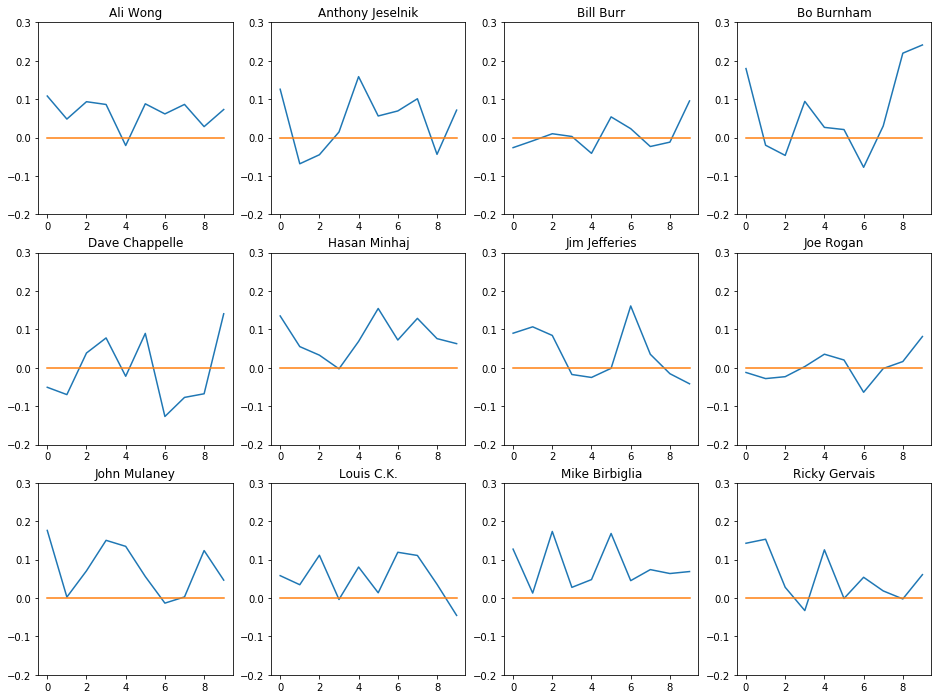

In [94]:
#==============================================================================
# Run the block two steps above to generate 'polarity_transcript'

# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(comedian_transcripts_cleaned.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(comedian_transcripts_cleaned['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

For the most part, they open one a positive and close with the same. It's a <br>
little interesting to see who starts a routine poitive and ends negative, or <br>
the otherway around. How would Woodie Allen or Rodney Dangerfield look here? <br>
Dave Chappelle certainly seesm to have some periods of darkness; Mike Birbiglia <br>
seems to be perpetually happy.

# Topic Modeling

## Introduction

Another popular text analysis technique is called topic modeling. The ultimate <br>
goal of topic modeling is to find various topics that are present in your corpus. <br>
Each document in the corpus will be made up of at least one topic, if not <br>
multiple topics. The order ot the words does not matter. The process takes a bag<br>
of words, then tries grouping the words on vectors where a human can look at the <br>
collection and determine what the summary of the words means.

This example covers the steps on how to do <code>Latent Dirichlet Allocation (LDA)</code>, <br>
which is one of many topic modeling techniques. It was specifically designed for<br>
text data.

To use a topic modeling technique, you need to provide (1) a document-term <br>
matrix and (2) the number of topics you would like the algorithm to pick up.

Once the topic modeling technique is applied, your job as a human is to interpret<br>
the results and see if the mix of words in each topic make sense. If they don't <br>
make sense, you can try changing up the number of topics, the terms in the <br>
document-term matrix, model parameters, or even try a different model.

LDA is a description of what is being performed. Latent, generally means hidden, or <br>
being incapable of being measured directly. Dirichlet is a type of probability <br>
distribution.

In [118]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [119]:
import pandas as pd
import pickle
# One of the required inputs is a term-document matrix
word_comedian_without_stop_words = pd.read_pickle('word_comedian_without_stop_words.pkl')
word_comedian_without_stop_words.head()
# tdm = data.transpose()
# tdm.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


In [120]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(word_comedian_without_stop_words)
corpus = matutils.Sparse2Corpus(sparse_counts)


In [121]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term), we need to specify two other parameters - the number of topics and the number of passes. Let's start the number of topics at 2, see if the results make sense, and increase the number from there.

In [122]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

2020-05-10 17:59:59,692 : INFO : using symmetric alpha at 0.5
2020-05-10 17:59:59,693 : INFO : using symmetric eta at 0.5
2020-05-10 17:59:59,696 : INFO : using serial LDA version on this node
2020-05-10 17:59:59,699 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 17:59:59,885 : INFO : -9.388 per-word bound, 669.9 perplexity estimate based on a held-out corpus of 12 documents with 41483 words
2020-05-10 17:59:59,886 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 17:59:59,925 : INFO : topic #0 (0.500): 0.008*"fucking" + 0.005*"fuck" + 0.005*"shit" + 0.005*"theyre" + 0.005*"say" + 0.005*"cause" + 0.005*"want" + 0.005*"went" + 0.004*"didnt" + 0.004*"thing"
2020-05-10 17:59:59,927 : INFO : topic #1 (0.500): 0.006*"shit" + 0.005*"fucking" + 0.005*"oh" + 0.005*"say" + 0.00

[(0,
  '0.007*"fucking" + 0.006*"say" + 0.005*"thing" + 0.005*"day" + 0.005*"went" + 0.005*"cause" + 0.005*"hes" + 0.005*"going" + 0.005*"theyre" + 0.005*"little"'),
 (1,
  '0.008*"shit" + 0.007*"fuck" + 0.006*"fucking" + 0.005*"oh" + 0.005*"man" + 0.005*"theyre" + 0.005*"going" + 0.004*"want" + 0.004*"dad" + 0.004*"say"')]

In [123]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

2020-05-10 18:00:20,160 : INFO : using symmetric alpha at 0.3333333333333333
2020-05-10 18:00:20,161 : INFO : using symmetric eta at 0.3333333333333333
2020-05-10 18:00:20,163 : INFO : using serial LDA version on this node
2020-05-10 18:00:20,166 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:00:20,358 : INFO : -9.573 per-word bound, 761.6 perplexity estimate based on a held-out corpus of 12 documents with 41483 words
2020-05-10 18:00:20,359 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:00:20,397 : INFO : topic #0 (0.333): 0.008*"fucking" + 0.007*"say" + 0.006*"went" + 0.005*"cause" + 0.005*"good" + 0.005*"theyre" + 0.005*"little" + 0.004*"really" + 0.004*"fuck" + 0.004*"want"
2020-05-10 18:00:20,398 : INFO : topic #1 (0.333): 0.007*"fucking" + 0.006*"shit" +

[(0,
  '0.007*"say" + 0.006*"thing" + 0.005*"joke" + 0.005*"didnt" + 0.005*"hes" + 0.005*"fucking" + 0.005*"day" + 0.005*"life" + 0.005*"theyre" + 0.005*"went"'),
 (1,
  '0.011*"fucking" + 0.007*"went" + 0.006*"oh" + 0.006*"fuck" + 0.006*"love" + 0.005*"want" + 0.005*"going" + 0.005*"day" + 0.005*"good" + 0.004*"thing"'),
 (2,
  '0.007*"shit" + 0.007*"fucking" + 0.006*"fuck" + 0.005*"oh" + 0.005*"going" + 0.005*"want" + 0.005*"say" + 0.005*"didnt" + 0.005*"theyre" + 0.004*"cause"')]

In [124]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

2020-05-10 18:00:22,313 : INFO : using symmetric alpha at 0.25
2020-05-10 18:00:22,314 : INFO : using symmetric eta at 0.25
2020-05-10 18:00:22,316 : INFO : using serial LDA version on this node
2020-05-10 18:00:22,321 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:00:22,504 : INFO : -9.776 per-word bound, 876.6 perplexity estimate based on a held-out corpus of 12 documents with 41483 words
2020-05-10 18:00:22,505 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:00:22,545 : INFO : topic #0 (0.250): 0.008*"fucking" + 0.006*"day" + 0.006*"shit" + 0.005*"going" + 0.005*"didnt" + 0.005*"hes" + 0.005*"thing" + 0.005*"fuck" + 0.004*"went" + 0.004*"want"
2020-05-10 18:00:22,546 : INFO : topic #1 (0.250): 0.006*"shit" + 0.006*"say" + 0.006*"fuck" + 0.005*"fucking" + 0.0

[(0,
  '0.010*"fucking" + 0.007*"shit" + 0.006*"day" + 0.006*"fuck" + 0.006*"want" + 0.005*"oh" + 0.005*"thing" + 0.005*"going" + 0.005*"went" + 0.005*"say"'),
 (1,
  '0.008*"cause" + 0.006*"says" + 0.006*"really" + 0.006*"life" + 0.005*"thing" + 0.005*"theres" + 0.005*"mean" + 0.005*"good" + 0.005*"hes" + 0.004*"goes"'),
 (2,
  '0.006*"dad" + 0.005*"didnt" + 0.005*"shit" + 0.005*"say" + 0.005*"going" + 0.005*"oh" + 0.005*"hey" + 0.005*"want" + 0.004*"good" + 0.004*"did"'),
 (3,
  '0.012*"fucking" + 0.008*"fuck" + 0.008*"theyre" + 0.007*"say" + 0.006*"theres" + 0.005*"went" + 0.005*"little" + 0.005*"shit" + 0.005*"going" + 0.005*"didnt"')]

These topics aren't looking too great. We've tried modifying our parameters. Let's try modifying our terms list as well.

## Topic Modeling - Attempt #2 (Nouns Only)

One popular trick is to look only at terms that are from one part of speech (only nouns, only adjectives, etc.). Check out the UPenn tag set: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.


In [125]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [126]:
# Read in the cleaned data, before the CountVectorizer step
comedian_transcripts_cleaned = pd.read_pickle('comedian_transcripts_cleaned.pkl')
comedian_transcripts_cleaned

,transcript,full_name
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you f...,Ali Wong
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were sur...,Anthony Jeselnik
bill,all right thank you thank you very much thank you thank you thank you how are you whats going o...,Bill Burr
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort ...,Bo Burnham
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens...,Dave Chappelle
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to d...,Hasan Minhaj
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit d...,Jim Jefferies
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for comin...,Joe Rogan
john,all right petunia wish me luck out there you will die on august thats pretty good all right hell...,John Mulaney
louis,introfade the music out lets roll hold there lights do the lights thank you thank you very much ...,Louis C.K.


In [127]:
import nltk
# nltk.download()
# Apply the nouns function to the transcripts to filter only on nouns

data_nouns = pd.DataFrame(comedian_transcripts_cleaned.transcript.apply(nouns))
data_nouns


,transcript
ali,ladies gentlemen stage ali hi thank hello na shit cause i ten minutes thank day year year people...
anthony,thank thank people i em i francisco city world im stage place cities place bit today baby baby b...
bill,thank thank pleasure georgia area oasis i june kind heat racism anybody look em drink lemonade m...
bo,macdonald farm e i o farm pig e i i snort macdonald farm e i hes years male product giraffe sex ...
dave,jokes living stare work profound train thought alchemists transforms levity livelihood trance ♪ ...
hasan,whats davis whats home i netflix la york i son davis california um year claps lord rings situati...
jim,ladies gentlemen stage mr jim jefferies thank thats end tour tour i child ah time home i girlfri...
joe,ladies gentlemen joe fuck thanks phone fuckface i phone motherfuckers eyes goddamn phone whoo wh...
john,petunia thats hello hello chicago thank crowd energy show okay thank crowds energy beginning pla...
louis,music lets lights lights thank i i place place miles direction building shit town sentence i dif...


In [128]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said',
                  'louis', 'dave', 'ricky', 'bo', 'bill', 'jim','john', 'hasan', 
                  'ali', 'anthony', 'mike', 'joe',
                  'fuck', 'fucking', 'shit', 'nigga']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abortion,abortions,abuse,...,yummy,ze,zealand,zee,zeppelin,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,2,0,0,...,0,0,10,0,0,0,0,0,0,0
bill,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,1,0,0
bo,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [130]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-05-10 18:01:16,379 : INFO : using symmetric alpha at 0.5
2020-05-10 18:01:16,380 : INFO : using symmetric eta at 0.5
2020-05-10 18:01:16,381 : INFO : using serial LDA version on this node
2020-05-10 18:01:16,383 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:01:16,486 : INFO : -8.942 per-word bound, 491.9 perplexity estimate based on a held-out corpus of 12 documents with 19367 words
2020-05-10 18:01:16,487 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:01:16,539 : INFO : topic #0 (0.500): 0.009*"thing" + 0.009*"day" + 0.007*"way" + 0.007*"life" + 0.007*"man" + 0.007*"cause" + 0.007*"hes" + 0.006*"guy" + 0.006*"things" + 0.006*"lot"
2020-05-10 18:01:16,540 : INFO : topic #1 (0.500): 0.008*"day" + 0.008*"thing" + 0.007*"man" + 0.007*"hes" + 0.007*"life" + 

[(0,
  '0.009*"life" + 0.008*"man" + 0.008*"thing" + 0.008*"day" + 0.008*"hes" + 0.007*"way" + 0.007*"lot" + 0.007*"cause" + 0.006*"guy" + 0.006*"dad"'),
 (1,
  '0.009*"day" + 0.009*"thing" + 0.006*"cause" + 0.006*"hes" + 0.006*"way" + 0.005*"man" + 0.005*"things" + 0.005*"id" + 0.005*"stuff" + 0.005*"years"')]

In [131]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-05-10 18:01:18,087 : INFO : using symmetric alpha at 0.3333333333333333
2020-05-10 18:01:18,088 : INFO : using symmetric eta at 0.3333333333333333
2020-05-10 18:01:18,091 : INFO : using serial LDA version on this node
2020-05-10 18:01:18,095 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:01:18,219 : INFO : -9.171 per-word bound, 576.5 perplexity estimate based on a held-out corpus of 12 documents with 19367 words
2020-05-10 18:01:18,221 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:01:18,255 : INFO : topic #0 (0.333): 0.009*"day" + 0.009*"thing" + 0.007*"life" + 0.007*"guy" + 0.007*"man" + 0.007*"hes" + 0.006*"lot" + 0.006*"cause" + 0.006*"way" + 0.005*"years"
2020-05-10 18:01:18,256 : INFO : topic #1 (0.333): 0.010*"thing" + 0.008*"day" + 0.008*"hes" + 

[(0,
  '0.012*"thing" + 0.010*"day" + 0.009*"life" + 0.009*"hes" + 0.007*"way" + 0.007*"joke" + 0.007*"kids" + 0.006*"guy" + 0.006*"years" + 0.006*"cause"'),
 (1,
  '0.009*"day" + 0.008*"cause" + 0.007*"man" + 0.007*"thing" + 0.007*"life" + 0.007*"house" + 0.006*"lot" + 0.006*"shes" + 0.006*"way" + 0.006*"dad"'),
 (2,
  '0.011*"man" + 0.007*"stuff" + 0.006*"repeat" + 0.006*"hes" + 0.006*"way" + 0.005*"lot" + 0.005*"eye" + 0.005*"contact" + 0.005*"didnt" + 0.004*"night"')]

In [132]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-05-10 18:01:20,016 : INFO : using symmetric alpha at 0.25
2020-05-10 18:01:20,019 : INFO : using symmetric eta at 0.25
2020-05-10 18:01:20,022 : INFO : using serial LDA version on this node
2020-05-10 18:01:20,027 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:01:20,197 : INFO : -9.431 per-word bound, 690.3 perplexity estimate based on a held-out corpus of 12 documents with 19367 words
2020-05-10 18:01:20,200 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:01:20,239 : INFO : topic #0 (0.250): 0.010*"thing" + 0.008*"day" + 0.008*"life" + 0.007*"way" + 0.007*"lot" + 0.007*"man" + 0.006*"hes" + 0.006*"gon" + 0.006*"years" + 0.005*"women"
2020-05-10 18:01:20,240 : INFO : topic #1 (0.250): 0.009*"day" + 0.008*"way" + 0.006*"man" + 0.006*"thing" + 0.006*"things"

[(0,
  '0.008*"day" + 0.008*"hes" + 0.007*"thing" + 0.007*"man" + 0.006*"joke" + 0.006*"stuff" + 0.006*"god" + 0.006*"years" + 0.005*"lot" + 0.005*"way"'),
 (1,
  '0.001*"way" + 0.001*"day" + 0.000*"man" + 0.000*"things" + 0.000*"thing" + 0.000*"cause" + 0.000*"hes" + 0.000*"theyre" + 0.000*"life" + 0.000*"stuff"'),
 (2,
  '0.011*"thing" + 0.010*"day" + 0.009*"cause" + 0.009*"man" + 0.009*"guy" + 0.009*"life" + 0.008*"way" + 0.008*"hes" + 0.007*"gon" + 0.007*"lot"'),
 (3,
  '0.015*"dad" + 0.008*"life" + 0.008*"shes" + 0.007*"mom" + 0.006*"school" + 0.006*"parents" + 0.006*"girl" + 0.006*"home" + 0.005*"hes" + 0.005*"house"')]

## Topic Modeling - Attempt #3 (Nouns and Adjectives)


In [133]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [134]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
ali,ladies gentlemen welcome stage ali wong hi welcome thank hello hello na shit cause i like ten mi...
anthony,thank san francisco thank good people surprised i em i special san francisco correct city world ...
bill,right thank thank pleasure greater atlanta georgia area oasis nice i i june nice wasnt miserable...
bo,old macdonald farm e i i o farm pig e i i snort old macdonald farm e i i bo burnham hes years ol...
dave,dirty jokes living stare most hard work profound train thought alchemists transforms levity live...
hasan,whats davis whats im home i netflix special la chicago new york i nah son davis california um go...
jim,ladies gentlemen welcome stage mr jim jefferies thank i uh thats end tour im happy tour i child ...
joe,ladies gentlemen joe fuck san francisco thanks i phone fuckface i phone motherfuckers eyes ta go...
john,right petunia august thats good right hello hello chicago nice nice thank wonderful crowd energy...
louis,music lets lights lights thank much i i i nice place nicest place many miles direction building ...


In [135]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aah,abc,abcs,ability,abject,able,...,ze,zealand,zee,zeppelin,zero,zillion,zombie,zombies,zoo,éclair
ali,0,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,1,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,10,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,0
bo,0,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [137]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-05-10 18:01:36,434 : INFO : using symmetric alpha at 0.5
2020-05-10 18:01:36,435 : INFO : using symmetric eta at 0.5
2020-05-10 18:01:36,436 : INFO : using serial LDA version on this node
2020-05-10 18:01:36,439 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:01:36,568 : INFO : -9.176 per-word bound, 578.4 perplexity estimate based on a held-out corpus of 12 documents with 17543 words
2020-05-10 18:01:36,569 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:01:36,608 : INFO : topic #0 (0.500): 0.004*"mom" + 0.003*"joke" + 0.003*"ass" + 0.002*"parents" + 0.002*"dick" + 0.002*"friend" + 0.002*"dog" + 0.002*"mad" + 0.002*"clinton" + 0.002*"wife"
2020-05-10 18:01:36,610 : INFO : topic #1 (0.500): 0.003*"joke" + 0.003*"parents" + 0.003*"mom" + 0.002*"door" + 0.002

[(0,
  '0.004*"ass" + 0.004*"mom" + 0.003*"dick" + 0.003*"wife" + 0.003*"gun" + 0.003*"clinton" + 0.003*"guns" + 0.002*"son" + 0.002*"dog" + 0.002*"stupid"'),
 (1,
  '0.005*"joke" + 0.003*"parents" + 0.003*"comedy" + 0.003*"mom" + 0.003*"jokes" + 0.003*"love" + 0.002*"door" + 0.002*"friend" + 0.002*"dead" + 0.002*"jenny"')]

In [138]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-05-10 18:01:43,842 : INFO : using symmetric alpha at 0.3333333333333333
2020-05-10 18:01:43,844 : INFO : using symmetric eta at 0.3333333333333333
2020-05-10 18:01:43,847 : INFO : using serial LDA version on this node
2020-05-10 18:01:43,852 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:01:43,981 : INFO : -9.461 per-word bound, 704.8 perplexity estimate based on a held-out corpus of 12 documents with 17543 words
2020-05-10 18:01:43,982 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:01:44,046 : INFO : topic #0 (0.333): 0.004*"joke" + 0.003*"mom" + 0.002*"dog" + 0.002*"dead" + 0.002*"parents" + 0.002*"son" + 0.002*"comedy" + 0.002*"friend" + 0.002*"jokes" + 0.002*"love"
2020-05-10 18:01:44,047 : INFO : topic #1 (0.333): 0.003*"ass" + 0.003*"joke" + 0.002*"

[(0,
  '0.004*"jenny" + 0.004*"repeat" + 0.004*"ahah" + 0.003*"gay" + 0.003*"young" + 0.003*"eye" + 0.003*"friend" + 0.003*"comedy" + 0.003*"contact" + 0.003*"tit"'),
 (1,
  '0.005*"joke" + 0.005*"ass" + 0.004*"guns" + 0.003*"cunt" + 0.003*"girlfriend" + 0.003*"husband" + 0.003*"ok" + 0.003*"pregnant" + 0.003*"class" + 0.003*"business"'),
 (2,
  '0.007*"mom" + 0.005*"parents" + 0.004*"joke" + 0.003*"clinton" + 0.003*"wife" + 0.003*"dick" + 0.003*"door" + 0.003*"mad" + 0.003*"gun" + 0.002*"president"')]

In [139]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-05-10 18:01:51,129 : INFO : using symmetric alpha at 0.25
2020-05-10 18:01:51,130 : INFO : using symmetric eta at 0.25
2020-05-10 18:01:51,132 : INFO : using serial LDA version on this node
2020-05-10 18:01:51,138 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 12 documents, updating model once every 12 documents, evaluating perplexity every 12 documents, iterating 50x with a convergence threshold of 0.001000
2020-05-10 18:01:51,263 : INFO : -9.797 per-word bound, 889.6 perplexity estimate based on a held-out corpus of 12 documents with 17543 words
2020-05-10 18:01:51,265 : INFO : PROGRESS: pass 0, at document #12/12
2020-05-10 18:01:51,304 : INFO : topic #0 (0.250): 0.003*"mom" + 0.003*"joke" + 0.003*"parents" + 0.002*"um" + 0.002*"comedy" + 0.002*"dog" + 0.002*"jokes" + 0.002*"friend" + 0.002*"ok" + 0.002*"ass"
2020-05-10 18:01:51,305 : INFO : topic #1 (0.250): 0.003*"joke" + 0.003*"mom" + 0.003*"parents" + 0.002*"door" + 0.002*

[(0,
  '0.007*"repeat" + 0.006*"eye" + 0.006*"contact" + 0.006*"tit" + 0.005*"ok" + 0.005*"cos" + 0.005*"brain" + 0.004*"ha" + 0.004*"um" + 0.004*"dog"'),
 (1,
  '0.004*"joke" + 0.004*"jenny" + 0.003*"jenner" + 0.003*"husband" + 0.003*"dead" + 0.003*"texas" + 0.003*"ass" + 0.003*"doctor" + 0.002*"door" + 0.002*"ok"'),
 (2,
  '0.005*"gun" + 0.005*"wife" + 0.005*"clinton" + 0.005*"ass" + 0.005*"guns" + 0.004*"mom" + 0.004*"son" + 0.003*"hell" + 0.003*"dog" + 0.003*"cow"'),
 (3,
  '0.006*"mom" + 0.006*"joke" + 0.005*"ahah" + 0.005*"mad" + 0.004*"parents" + 0.004*"door" + 0.003*"comedy" + 0.003*"son" + 0.003*"gay" + 0.003*"brown"')]

## Identify Topics in Each Document

Out of the 9 topic models we looked at, the nouns and adjectives, 4 topic one made the most sense. So let's pull that down here and run it through some more iterations to get more fine-tuned topics.

In [ ]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

These four topics look pretty decent. Let's settle on these for now.
* Topic 0: mom, parents
* Topic 1: husband, wife
* Topic 2: guns
* Topic 3: profanity

In [140]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'ali'),
 (3, 'anthony'),
 (2, 'bill'),
 (0, 'bo'),
 (3, 'dave'),
 (3, 'hasan'),
 (2, 'jim'),
 (1, 'joe'),
 (2, 'john'),
 (0, 'louis'),
 (1, 'mike'),
 (1, 'ricky')]

For a first pass of LDA, these kind of make sense to me, so we'll call it a day for now.
* Topic 0: mom, parents [Anthony, Hasan, Louis, Ricky]
* Topic 1: husband, wife [Ali, John, Mike]
* Topic 2: guns [Bill, Bo, Jim]
* Topic 3: profanity [Dave, Joe]

## Additional Exercises

1. Try further modifying the parameters of the topic models above and see if you can get better topics.
2. Create a new topic model that includes terms from a different [part of speech](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) and see if you can get better topics.